In [61]:
from keras.datasets import mnist

In [62]:
from warnings import filterwarnings

In [63]:
filterwarnings("ignore")

In [64]:
import matplotlib.pyplot as plt

In [65]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [66]:
X_train.shape

(60000, 28, 28)

In [67]:
X_test.shape

(10000, 28, 28)

In [68]:
single_image=X_train[0]

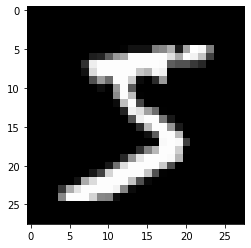

In [69]:
plt.imshow(single_image,cmap='gray')

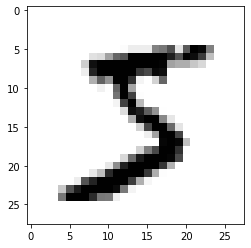

In [70]:
plt.imshow(single_image,cmap='gray_r')

In [71]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [72]:
#one hot encoding

In [73]:
from keras.utils.np_utils import to_categorical

In [74]:
y_cat_test=to_categorical(y_test,num_classes=10)
y_cat_train=to_categorical(y_train,num_classes=10)

In [75]:
y_cat_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [76]:
#scaling the data

In [77]:
X_train.max()

255

In [89]:
X_train=X_train/255
X_test=X_test/255

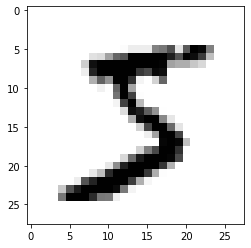

In [90]:
plt.imshow(scaled_X_train[0],cmap='gray_r')

In [91]:
#adding color change

In [92]:
X_train=X_train.reshape(60000, 28, 28,1)

In [93]:
X_test=X_test.reshape(10000, 28, 28,1)

In [94]:
from keras.models import Sequential

In [95]:
from keras.layers import Conv2D,Dense,MaxPool2D,Flatten

In [96]:
model=Sequential()
#convolution layer
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28, 28,1),activation='relu'))
#pooling layer(subsampling)
model.add(MaxPool2D(pool_size=(2,2)))
#flattening
model.add(Flatten())
#Dense layer
model.add(Dense(128,activation='relu'))
#output layer
model.add(Dense(10,activation='softmax'))


In [97]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [98]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 4608)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 128)               589952    
_________________________________________________________________
dense_20 (Dense)             (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [99]:
model.fit(X_train,y_cat_train,epochs=5)

Epoch 1/5
60000/60000 [==============================] - 24s 396us/step - loss: 0.1506 - acc: 0.9538
Epoch 2/5
60000/60000 [==============================] - 27s 446us/step - loss: 0.0549 - acc: 0.9843
Epoch 3/5
60000/60000 [==============================] - 24s 400us/step - loss: 0.0401 - acc: 0.9881
Epoch 4/5
60000/60000 [==============================] - 25s 414us/step - loss: 0.0309 - acc: 0.9913
Epoch 5/5
60000/60000 [==============================] - 26s 441us/step - loss: 0.0249 - acc: 0.9931


In [100]:
predictions=model.predict_classes(X_test)

In [101]:
from sklearn.metrics import classification_report

In [103]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.98      0.99      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.98      0.99      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

